In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip list

Package                           Version
--------------------------------- --------------
anyio                             3.6.2
appdirs                           1.4.4
apt-xapian-index                  0.49
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
asttokens                         2.2.1
attrs                             22.1.0
autopep8                          2.0.1
Babel                             2.11.0
backcall                          0.2.0
beautifulsoup4                    4.11.1
bleach                            5.0.1
blinker                           1.4
certifi                           2022.12.7
cffi                              1.15.1
chardet                           4.0.0
charset-normalizer                2.1.1
click                             8.0.3
colorama                          0.4.4
comm                              0.1.2
command-not-found                 0.3
contourpy               

## Переобучение и недообучение

Пусть имеем 2 модели: полиномиальную и обыкновенную немодифицированную линейную без свободного коэффициента

$$
a_1(x) = \beta_1\cdot d + \beta_2 \cdot d^2 + ... + \beta_{25}\cdot d^{25} + \beta_0
$$

$$
a_2(x) = \beta_1\cdot d
$$

Давайте сгенерируем выборку $(X, Y)$ следующим образом. Скажем, что **X** - какие-то случайные числа, равномерно лежащие в отрезке $[0, 20]$. Ответы (вектор таргетов $Y$) - удвоенные **X**-ы, сгенерированные с некоторым шумом, распределенным тоже равномерно на отрезке $[-6, 6]$. 

Разделим выборку на тренировочную и тестовую (например, в пропорциях 4:1) и проверим, в каком случае модель ошибается сильнее: при сложном моделировании или простом?

In [3]:
import numpy as np
"""
генерируем объекты X с одним признаком
из 120 случайно сгенерированных элементов (x6, лежат на отрезке [0,20]), отсортированных и представленных как массив np
"""
X = np.array(sorted([20 * x for x in np.random.rand(120, 1)]))

In [4]:
"""
создаем Y (признаки) путем умножения X на 2 + шум
шум: генерируем случайно числа -1 или 1 умножаем на 6 и умножаем на случайное число от 1 до 0
"""
Y = np.array([2 * el + np.random.choice([-1, 1]) * 6 * np.random.rand() for el in X])

In [5]:
# посмотрим последние 5 чиселок
X[-5:], Y[-5:]

(array([[19.46575692],
        [19.46703759],
        [19.53365199],
        [19.70963731],
        [19.97139138]]),
 array([[34.02392272],
        [42.95371287],
        [44.38563299],
        [44.62751669],
        [34.12560405]]))

In [6]:
"""
разбиваем выборку на train и test в пропорции 4:1
воспользуемся библиотекой sklearn
"""

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [7]:
# тренировочная выборка получила 72 элемента, тестовая - 48
X_train.shape, Y_train.shape, X_test.shape, X_test.shape

((72, 1), (72, 1), (48, 1), (48, 1))

In [8]:
"""
находим индексы элементов, сортируе по возрастанию (значений под индексами, не индексов)
"""
index_argsort = np.argsort(X_train.reshape(72,))
index_argsort_test = np.argsort(X_test.reshape(48,))

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, Y)

LinearRegression(fit_intercept=False)

In [10]:
np.mean(abs(model.predict(X_train) - Y_train))

3.2778787125830413

In [11]:
np.mean(abs(model.predict(X_test) - Y_test))

3.0868442939533707

In [12]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 10
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#696969'

mlp.rcParams['ytick.major.size'] = 10
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#696969'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

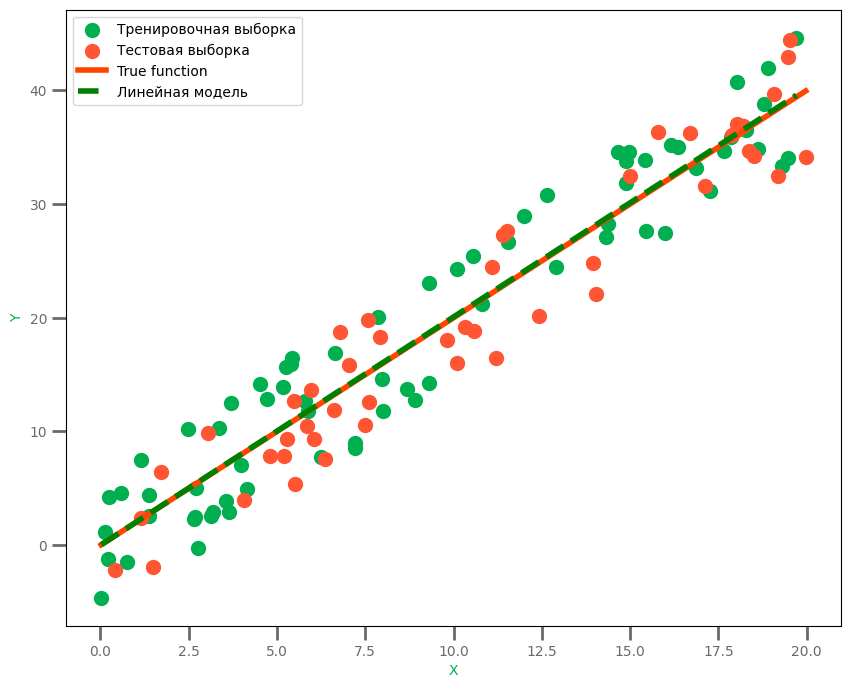

In [13]:
"""
Нарисуем график для тренировочной выборки
"""
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10, 8)

# сначала точки для тренировочной и тестовой выборки
plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)

# рисуем прямую, которая показывает эталонный Y
plt.plot(X, [2 * x for x in X], '#FF4500', linewidth = 4)

# рисуем предсказанные данные на тренировочной выборке
plt.plot(X_train[index_argsort], 
        model.predict(X_train[index_argsort]),
        '--g', linewidth = 4)



plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

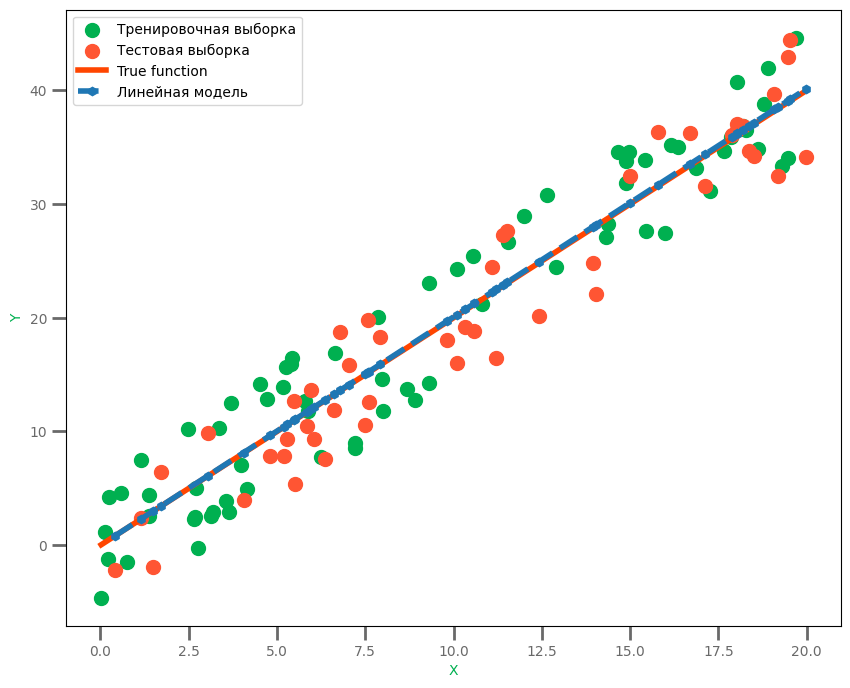

In [14]:
"""
Нарисуем график для тестовой выборки
"""
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10, 8)

# сначала точки для тренировочной и тестовой выборки
plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)

# рисуем прямую, которая показывает эталонный Y
plt.plot(X, [2 * x for x in X], '#FF4500', linewidth = 4)

# рисуем предсказанные данные на тренировочной выборке
plt.plot(X_test[index_argsort_test], 
        model.predict(X_test[index_argsort_test]),
        '--h', linewidth = 4)

plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [15]:
model.coef_

array([[2.0075913]])

In [16]:
"""
Теперь создадим данные для полиномиальной модели
Добавляем колонки в которых числа из колонки X_train
возводим в степень в цикле от 2 до 25, получаем массив (72, 25)

"""

X_pol = X_train.copy()

for k in range(2, 26):
    X_pol = np.append(X_pol,
                     np.array([x ** k for x in X_pol[:,0]]).reshape(72, -1),
                      axis=1)

In [17]:
X_pol[0], X_pol.shape

(array([2.67899700e+00, 7.17702495e+00, 1.92272283e+01, 5.15096871e+01,
        1.37994298e+02, 3.69686310e+02, 9.90388517e+02, 2.65324787e+03,
        7.10804309e+03, 1.90424262e+04, 5.10146026e+04, 1.36667968e+05,
        3.66133076e+05, 9.80869414e+05, 2.62774622e+06, 7.03972426e+06,
        1.88594002e+07, 5.05242766e+07, 1.35354386e+08, 3.62613994e+08,
        9.71441804e+08, 2.60248968e+09, 6.97206206e+09, 1.86781334e+10,
        5.00386634e+10]),
 (72, 25))

In [18]:
"""
создаем новую модель
"""
from sklearn.linear_model import LinearRegression
model_pol = LinearRegression(normalize=True)
model_pol.fit(X_pol, Y_train)

LinearRegression(normalize=True)

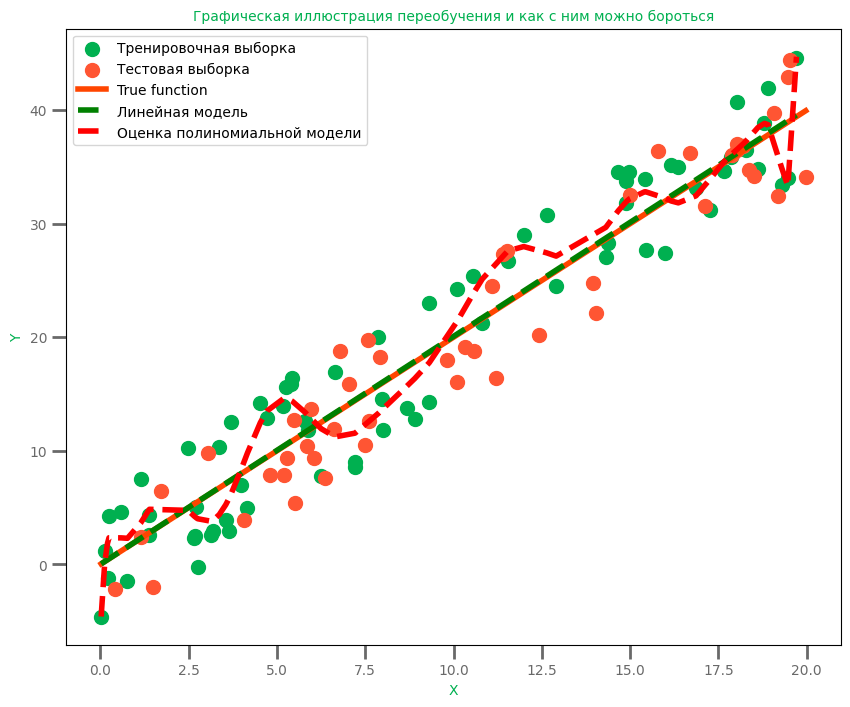

In [19]:
"""
Нарисуем график для линейной  модели и полиномиальной (тренировочные данные)
"""
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10, 8)

# сначала точки для тренировочной и тестовой выборки
plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)

# рисуем прямую, которая показывает эталонный Y
plt.plot(X, [2 * x for x in X], '#FF4500', linewidth = 4)

# рисуем предсказанные данные на тренировочной выборке первой модели
plt.plot(X_train[index_argsort], 
        model.predict(X_train[index_argsort]),
        '--g', linewidth = 4)
plt.plot(X_train[index_argsort], 
        model_pol.predict(X_pol[index_argsort]),
        '--r', linewidth=4)




plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Линейная модель', 'Оценка полиномиальной модели'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графическая иллюстрация переобучения и как с ним можно бороться')

plt.show()

In [20]:
"""
оценка линейной модели
"""
np.mean((model.predict(X_train) - Y_train)**2)

13.669062289859793

In [21]:
"""
Оценка полиномиальной модели, модель явно переобучилась на тестовых данных
"""
np.mean((model_pol.predict(X_pol) - Y_train)**2)

8.428540687813156

In [22]:
"""
создадим тестовые данные для
полиномиальной модели
Добавляем колонки в которых числа из колонки X_test
возводим в степень в цикле от 2 до 25, получаем массив (48, 25)
"""

X_pol_test = X_test.copy()
for k in range(2, 26):
    X_pol_test = np.append(X_pol_test, 
                         np.array([x ** k for x in X_pol_test[:,0]]).reshape(48, -1),
                          axis=1)

In [23]:
import pandas as pd
pd.DataFrame(X_pol_test).head(3)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,5.293957,28.025983,148.368352,785.455700,4.158169e+03,2.201317e+04,1.165368e+05,6.169407e+05,3.266057e+06,1.729037e+07,...,3.806158e+11,2.014964e+12,1.066713e+13,5.647133e+13,2.989568e+14,1.582665e+15,8.378559e+15,4.435573e+16,2.348173e+17,1.243113e+18
1,19.084740,364.227319,6951.183868,132661.540191,2.531811e+06,4.831896e+07,9.221548e+08,1.759908e+10,3.358740e+11,6.410067e+12,...,3.097278e+20,5.911074e+21,1.128113e+23,2.152975e+24,4.108896e+25,7.841722e+26,1.496572e+28,2.856169e+29,5.450925e+30,1.040295e+32
2,7.488043,56.070787,419.860462,3143.933171,2.354191e+04,1.762828e+05,1.320013e+06,9.884316e+06,7.401418e+07,5.542214e+08,...,9.769970e+13,7.315795e+14,5.478099e+15,4.102024e+16,3.071613e+17,2.300037e+18,1.722278e+19,1.289649e+20,9.656947e+20,7.231163e+21


In [24]:
np.mean((model_pol.predict(X_pol_test) - Y_test) ** 2)

187.64039226800855

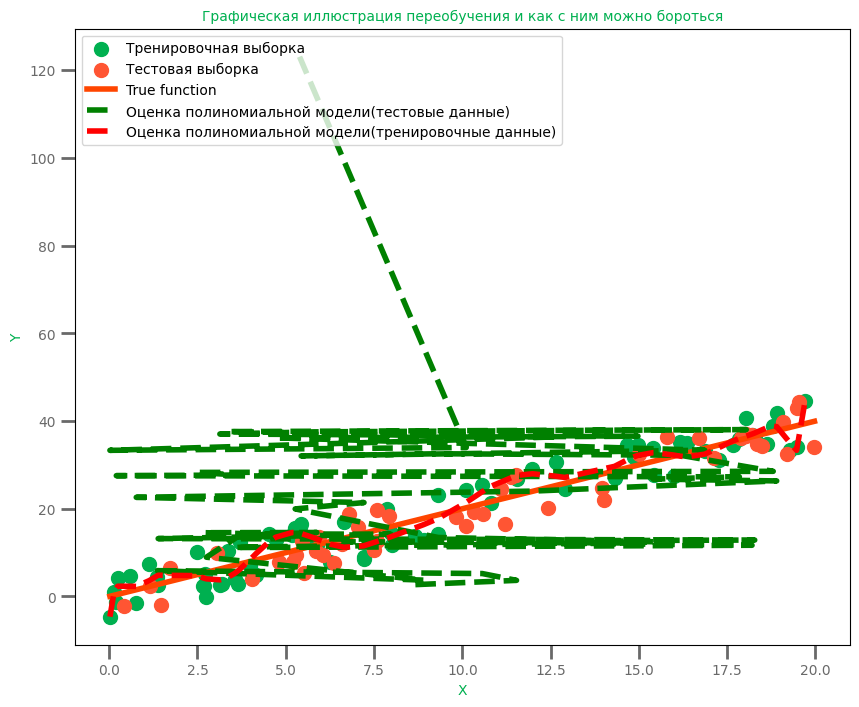

In [25]:
"""
Нарисуем график для линейной  модели и полиномиальной (тестовые данные)
"""
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(10, 8)

# сначала точки для тренировочной и тестовой выборки
plt.scatter(X_train, Y_train, c='#00B050', s=100)
plt.scatter(X_test, Y_test, c='#FF5533', s=100)

# рисуем прямую, которая показывает эталонный Y
plt.plot(X, [2 * x for x in X], '#FF4500', linewidth = 4)

# рисуем предсказанные данные на тренировочной выборке первой модели
plt.plot(X_train[index_argsort_test], 
        model_pol.predict(X_pol_test[index_argsort_test]),
        '--g', linewidth = 4)
plt.plot(X_train[index_argsort], 
        model_pol.predict(X_pol[index_argsort]),
        '--r', linewidth=4)




plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'True function',
            'Оценка полиномиальной модели(тестовые данные)', 'Оценка полиномиальной модели(тренировочные данные)'], loc = 'upper left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Графическая иллюстрация переобучения и как с ним можно бороться')

plt.show()